In [ ]:
#install relevant packages
#!pip install statsbombpy
#!pip install mplsoccer
#!pip install highlight_text

In [1]:
#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

# Load Competiton, Match, and Event Data from statsbombpy

In [2]:
#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

#print a list of free competitions
free_comps

competition_id  season_id   country_name        competition_name  \
0                9        281        Germany           1. Bundesliga   
1                9         27        Germany           1. Bundesliga   
2             1267        107         Africa  African Cup of Nations   
3               16          4         Europe        Champions League   
4               16          1         Europe        Champions League   
..             ...        ...            ...                     ...   
70              35         75         Europe      UEFA Europa League   
71              53        315         Europe       UEFA Women's Euro   
72              53        106         Europe       UEFA Women's Euro   
73              72        107  International       Women's World Cup   
74              72         30  International       Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False                      False   
2                male              False                       True   
3                male              False                      False   
4                male              False                      False   
..                ...                ...                        ...   
70               male              False                      False   
71             female              False                       True   
72             female              False                       True   
73             female              False                       True   
74             female              False                       True   

   season_name               match_updated           match_updated_360  \
0    2023/2024  2024-09-28T20:46:38.893391  2025-07-06T04:26:07.636270   
1    2015/2016  2024-05-19T11:11:14.192381                        None   
2         2023  2024-09-28T01:57:35.846538                        None   
3    2018/2019  2025-05-08T15:10:50.835274     2021-06-13T16:17:31.694   
4    2017/2018  2024-02-13T02:35:28.134882     2021-06-13T16:17:31.694   
..         ...                         ...                         ...   
70   1988/1989  2024-02-12T14:45:05.702250     2021-06-13T16:17:31.694   
71        2025  2025-07-28T14:19:20.467348  2025-07-29T16:03:07.355174   
72        2022  2024-02-13T13:27:17.178263  2024-02-13T13:30:52.820588   
73        2023  2025-07-14T10:07:06.620906  2025-07-14T10:10:27.224586   
74        2019  2024-08-08T15:57:56.748740     2021-06-13T16:17:31.694   

           match_available_360             match_available  
0   2025-07-06T04:26:07.636270  2024-09-28T20:46:38.893391  
1                         None  2024-05-19T11:11:14.192381  
2                         None  2024-09-28T01:57:35.846538  
3                         None  2025-05-08T15:10:50.835274  
4                         None  2024-02-13T02:35:28.134882  
..                         ...                         ...  
70                        None  2024-02-12T14:45:05.702250  
71  2025-07-29T16:03:07.355174  2025-07-28T14:19:20.467348  
72  2024-02-13T13:30:52.820588  2024-02-13T13:27:17.178263  
73  2025-07-14T10:10:27.224586  2025-07-14T10:07:06.620906  
74                        None  2024-08-08T15:57:56.748740  

[75 rows x 12 columns]

In [3]:
#call the statsbombpy API to get a list of matches for a given competition
#Euro 2024 competition id, season id
#competition_id=55, season_id=282
euro_2024_matches = sb.matches(competition_id=55, season_id=282)

#print the first 5 matches listed
euro_2024_matches.head(5)

match_id  match_date      kick_off         competition season    home_team  \
0   3942819  2024-07-10  22:00:00.000  Europe - UEFA Euro   2024  Netherlands   
1   3943043  2024-07-14  22:00:00.000  Europe - UEFA Euro   2024        Spain   
2   3942752  2024-07-09  22:00:00.000  Europe - UEFA Euro   2024        Spain   
3   3942382  2024-07-06  22:00:00.000  Europe - UEFA Euro   2024  Netherlands   
4   3942349  2024-07-05  22:00:00.000  Europe - UEFA Euro   2024     Portugal   

  away_team  home_score  away_score match_status  ...  \
0   England           1           2    available  ...   
1   England           2           1    available  ...   
2    France           2           1    available  ...   
3    Turkey           2           1    available  ...   
4    France           0           0    available  ...   

             last_updated_360 match_week competition_stage  \
0  2024-07-15T07:57:36.684453          6       Semi-finals   
1  2024-07-15T15:52:24.778809          7             Final   
2  2024-07-10T13:01:26.597509          6       Semi-finals   
3  2024-07-10T06:56:35.146850          5    Quarter-finals   
4  2024-07-12T02:00:16.871522          5    Quarter-finals   

                 stadium            referee               home_managers  \
0      Signal-Iduna-Park       Felix Zwayer               Ronald Koeman   
1  Olympiastadion Berlin  François Letexier  Luis de la Fuente Castillo   
2          Allianz Arena      Slavko Vinčić  Luis de la Fuente Castillo   
3  Olympiastadion Berlin     Clément Turpin               Ronald Koeman   
4       Volksparkstadion     Michael Oliver   Roberto Martínez Montoliú   

       away_managers data_version shot_fidelity_version xy_fidelity_version  
0   Gareth Southgate        1.1.0                     2                   2  
1   Gareth Southgate        1.1.0                     2                   2  
2   Didier Deschamps        1.1.0                     2                   2  
3  Vincenzo Montella        1.1.0                     2                   2  
4   Didier Deschamps        1.1.0                     2                   2  

[5 rows x 22 columns]

In [ ]:
#create a variable for the team you want to look into
team="England"

#filter for only matches that the focus team played in
matches_df = euro_2024_matches[(euro_2024_matches['home_team'] == team)|(euro_2024_matches['away_team'] == team)]

#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=False)

In [ ]:
matches_df.head(5)

In [ ]:
#create a variable containing the first match id in the data frame
latest_match_id = matches_df.match_id.iloc[0]

#latest_match_id=3943043

In [ ]:
#call the statsbombpy events API to bring in the event data for the match
events_df = sb.events(match_id=latest_match_id)

#print the first 5 rows of data
events_df.head(5)

In [ ]:
#print a list of columns available in the event data
events_df.columns

In [ ]:
#separate start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

# Example One: Passes and Carries into the Final Third

"Which players progressed the ball into the final third the most?"

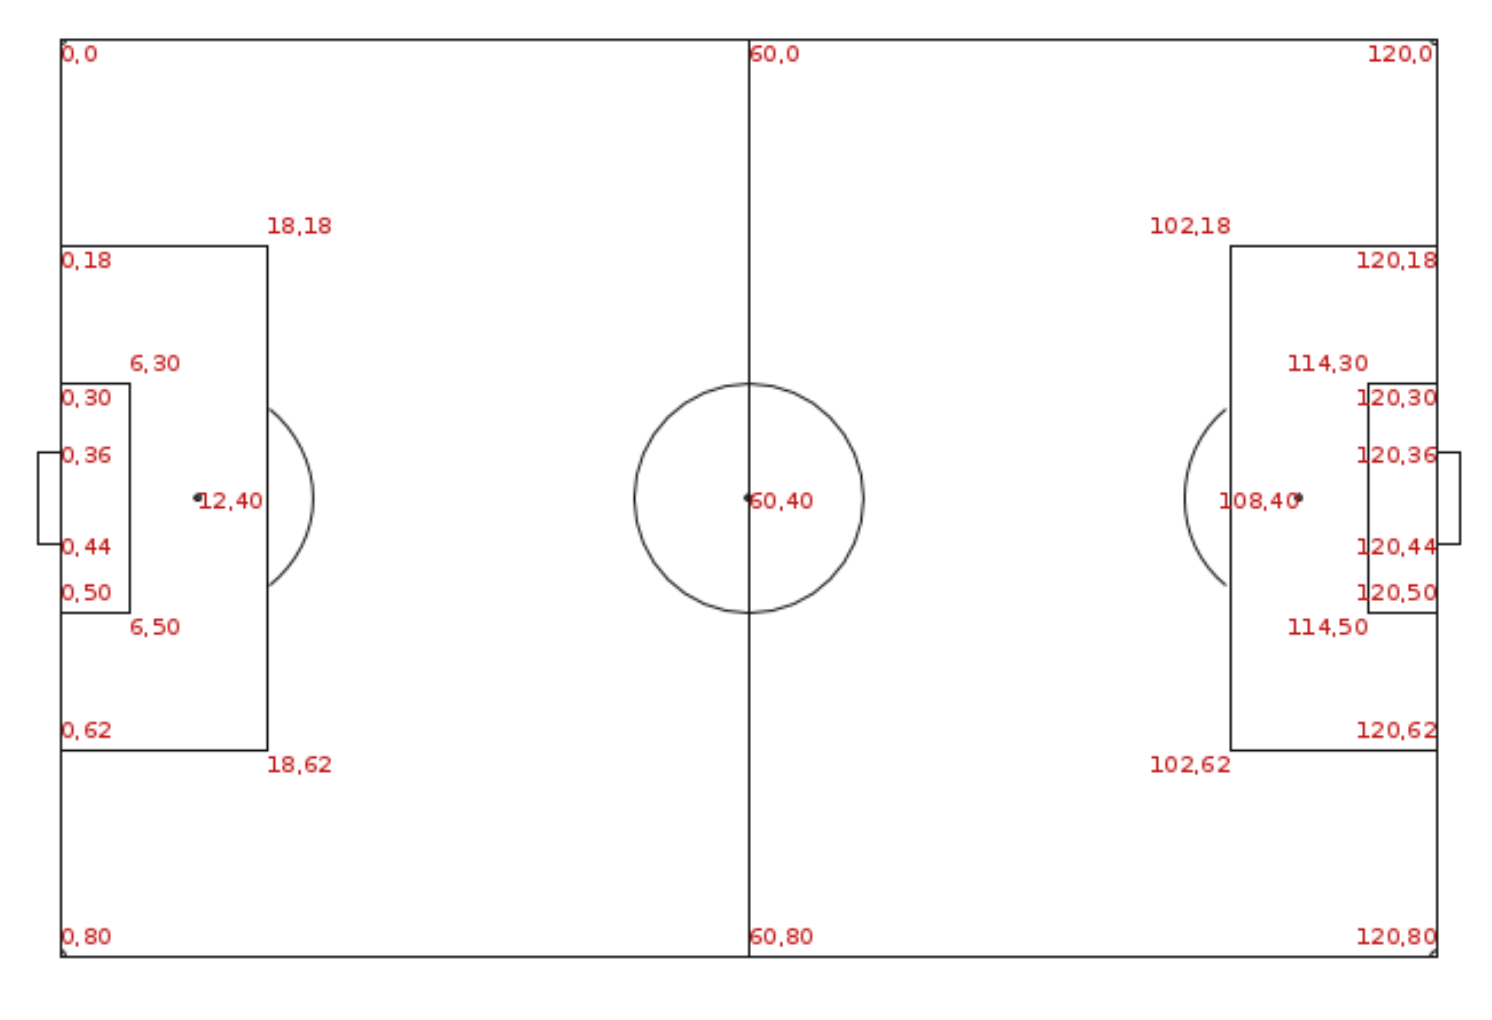

## Data Manipulation

In [ ]:
events_df.pass_outcome.unique()

In [ ]:
#filter for events done by the focus team
#filter by event type to get only passes
#filter for passes that started outside of the final third
#filter for passes that ended in the final third
#filter for completed passes
f3rd_passes=events_df[(events_df.team==team)&(events_df.type=="Pass")&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())]

#get count for each player
f3rd_passes_count=f3rd_passes.groupby('player').size().reset_index()

In [ ]:
f3rd_passes_count

In [ ]:
#rename second column
f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]: "Passes" }, inplace = True)

In [ ]:
f3rd_passes_count

In [ ]:
#get final third carries for focus team
f3rd_carries=events_df[(events_df.type=="Carry")&(events_df.x<80)&(events_df.carry_end_x>80)&(events_df.team==team)]

#get count for each player
f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()

#rename second column
f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)

In [ ]:
f3rd_carries_count

In [ ]:
#combine dataframes
progressions_df=pd.merge(f3rd_passes_count, f3rd_carries_count,
                    how="outer", on=["player"])

In [ ]:
progressions_df

In [ ]:
#add 0 where value is NaN
progressions_df=progressions_df.fillna(0)

In [ ]:
progressions_df

In [ ]:
#add a new column with the total
progressions_df['total']=progressions_df['Passes']+progressions_df['Carries']

In [ ]:
progressions_df

In [ ]:
progressions_df.sort_values(by='total', ascending=False, inplace=True)

In [ ]:
progressions_df

## Visualise

In [ ]:
#create stacked bar chart
pass_colour='#e21017'
carry_colour='blue'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
progressions_df.sort_values(by='total', ascending=True, inplace=True)

#include only relevant columns
barchart_df=progressions_df[["player", "Passes", "Carries"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_df.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour],legend=True,figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="Progressions into Final 3rd",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Progressions into Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

In [ ]:
#visualise for a given player
player_name="Jude Bellingham"

player_passes=f3rd_passes[(f3rd_passes.player==player_name)]
player_carries=f3rd_carries[(f3rd_carries.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the carries
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros Final', fontsize=30,color='black')

# Example Two: Comparing Touch Maps

"Was player A's on ball position similar to player B's?"

## Data Manipulation

In [ ]:
player1="Luke Shaw"
player2="Kyle Walker"
touches=['Pass', 'Ball Receipt*', 'Carry', 'Clearance', 'Foul Won', 'Block',
'Ball Recovery', 'Duel', 'Dribble', 'Interception', 'Miscontrol', 'Shot']

In [ ]:
player1_df=events_df[(events_df.player==player1)&(events_df.type.isin(touches))]
player2_df=events_df[(events_df.player==player2)&(events_df.type.isin(touches))]

## Visualise

In [ ]:
#create colour map
colour1="white"
colour2="#c3c3c3"
colour3="#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

In [ ]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

#create a grid of pitches
#define pitch style
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2,half=False)

#create a grid - in this example, one row of two pitches
fig, axs = pitch.grid(nrows=1, ncols=2
                      ,figheight=16,
                      grid_width=0.65,
                      endnote_height=0.03, endnote_space=0.05,
                      axis=False,title_space=0.02, title_height=0.06, grid_height=0.8)

#get data for heatmap
#player1
bin_statistic1 = pitch.bin_statistic(player1_df.x, player1_df.y, statistic='count',
bins=(6, 4),normalize=True)
#player2
bin_statistic2 = pitch.bin_statistic(player2_df.x, player2_df.y, statistic='count',
bins=(6, 4),normalize=True)

#calculate vmax value
#we want both our heatmaps to use the same colour spectrum
vmax1=bin_statistic1['statistic'].max()
vmax2=bin_statistic2['statistic'].max()

if vmax1>vmax2:
  vmax=vmax1
else:
  vmax=vmax2

#set vmin as zero
vmin=0

#plot heatmap for player1
heatmap1 = pitch.heatmap(bin_statistic1, ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate1 = pitch.label_heatmap(bin_statistic1, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][0],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player1}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][0],style='italic')


#plot heatmap for player2
heatmap2 = pitch.heatmap(bin_statistic2, ax=axs['pitch'][1], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate2 = pitch.label_heatmap(bin_statistic2, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][1],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player2}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][1],style='italic')

# Bonus

Get top xG Performers across the tournament. Create a shot map for the top player.

In [ ]:
# get event data for entire season
comp_events_df=sb.competition_events(
     country='Europe',
     division='UEFA Euro',
     season='2024',
     gender="male")

In [ ]:
comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
comp_events_df[['pass_end_x', 'pass_end_y']] = comp_events_df['pass_end_location'].apply(pd.Series)
comp_events_df[['carry_end_x', 'carry_end_y']] = comp_events_df['carry_end_location'].apply(pd.Series)

In [ ]:
# get non penalty shots and non penalty goals
shots_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")]
goals_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")&(comp_events_df.shot_outcome=="Goal")]

#shots
#get count for each player, include team info
shots_count=shots_df.groupby(['player','team']).size().reset_index()

#rename second column
shots_count.rename(columns={shots_count.columns[2]: "np Shots" }, inplace = True)


#goals
#get count for each player, include team info
goals_count=goals_df.groupby(['player', 'team']).size().reset_index()

#rename second column
goals_count.rename(columns={goals_count.columns[2]: "np Goals" }, inplace = True)


#xG
#get count for each player, include team info
xg_sum=shots_df.groupby(['player', 'team'])['shot_statsbomb_xg'].sum().reset_index()

#rename second column
xg_sum.rename(columns={xg_sum.columns[2]: "np xG" }, inplace = True)

#round up to 2 decimal places
xg_sum['np xG']=xg_sum['np xG'].round(2)

In [ ]:
#combine dataframes
shot_stats=pd.merge(shots_count, goals_count,
                    how="outer", on=["player", "team"])

shot_stats=pd.merge(shot_stats, xg_sum,
                    how="outer", on=["player", "team"])

In [ ]:
#add 0 where value is NaN
shot_stats=shot_stats.fillna(0)

#sort to get top goalscorers, change by=' ' to get top xG, or top Shots
shot_stats=shot_stats.sort_values(by='np xG', ascending=False)

In [ ]:
shot_stats.head(10)

In [ ]:
#Shot map for top scorer
xg_player=shot_stats.player.iloc[0]

player_goals_df=goals_df[(goals_df.player==xg_player)]

player_shots_df=shots_df[(shots_df.player==xg_player)&(shots_df.shot_outcome!="Goal")]

In [ ]:
pitch = VerticalPitch(pitch_type='statsbomb',half=True,pad_bottom=-11)
fig, ax = pitch.draw(figsize=(12, 10))

shot_colour='red'
goal_colour='blue'

shots = pitch.scatter(player_shots_df.x, player_shots_df.y,
#make size relative to xG value
s=player_shots_df.shot_statsbomb_xg*1000,
c=shot_colour,
label='Shots',
marker='o',
alpha=0.5,
ax=ax)

goals = pitch.scatter(player_goals_df.x, player_goals_df.y,
#make size relative to xG value
s=player_goals_df.shot_statsbomb_xg*1000,
c='white',
edgecolors=goal_colour,
label='Goals',
marker='football',
ax=ax)

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

ax_text(0, 125, f'{xg_player}: Shot Map, Euro 2024', ha='left', c='black',va='center', fontsize=25,ax=ax,style='italic')